# Analyse de gènes différentiellement exprimés

Chargement des données et apperçu

In [1]:
expMat = read.table("exprMat_DUO.tsv", header = T, sep = "\t", row.names = 1)
head(expMat)

,condA_1,condA_2,condA_3,condA_4,condA_5,condA_6,condA_7,condA_8,condA_9,condA_10,⋯,condB_2,condB_3,condB_4,condB_5,condB_6,condB_7,condB_8,condB_9,condB_10,Correct_Answer
gene1,68,47,80,88,90,57,36,42,134,64,⋯,61,80,88,35,54,88,78,95,97,H0
gene2,79,64,50,97,77,64,62,107,108,92,⋯,86,83,106,102,76,117,87,113,66,H0
gene3,88,53,108,43,60,67,101,48,85,76,⋯,64,57,106,95,58,101,67,92,96,H0
gene4,37,76,72,89,80,40,87,88,71,48,⋯,74,69,51,40,50,80,103,63,69,H0
gene5,8,49,41,31,62,59,75,48,44,47,⋯,19,63,49,36,36,21,37,44,11,H0
gene6,85,81,58,72,52,55,94,68,57,51,⋯,104,82,118,70,71,96,51,78,71,H0


Nombre de réplicas pour chaque expérience :

In [2]:
rep = 10

## Test pour la première expérience 

In [3]:
expA = expMat[1, 1:rep]
expB = expMat[1, (rep+1):(2*rep)]

Calcul du *t-test*

In [4]:
test  = t.test(expA, expB)
test$statistic
test$p.value

t 
-0.5190724

[1] 0.6108075

In [5]:
alpha = 0.05 
if(test$p.value < alpha){
  print("H1 :: gene is differentially expressed")
}else{
  print("H0 :: gene is not differentially expressed")
}

[1] "H0 :: gene is not differentially expressed"


Le gène 1 est bien **différentiellement** exprimé !

## Calcul de la p-value pour tous les gènes

In [6]:
pval = NULL
for(i in 1:nrow(expMat)){

  expA = expMat[i, 1:rep]
  expB = expMat[i, (rep+1):(2*rep)]
  
  pval = c(pval, t.test(expA, expB)$p.value)

}

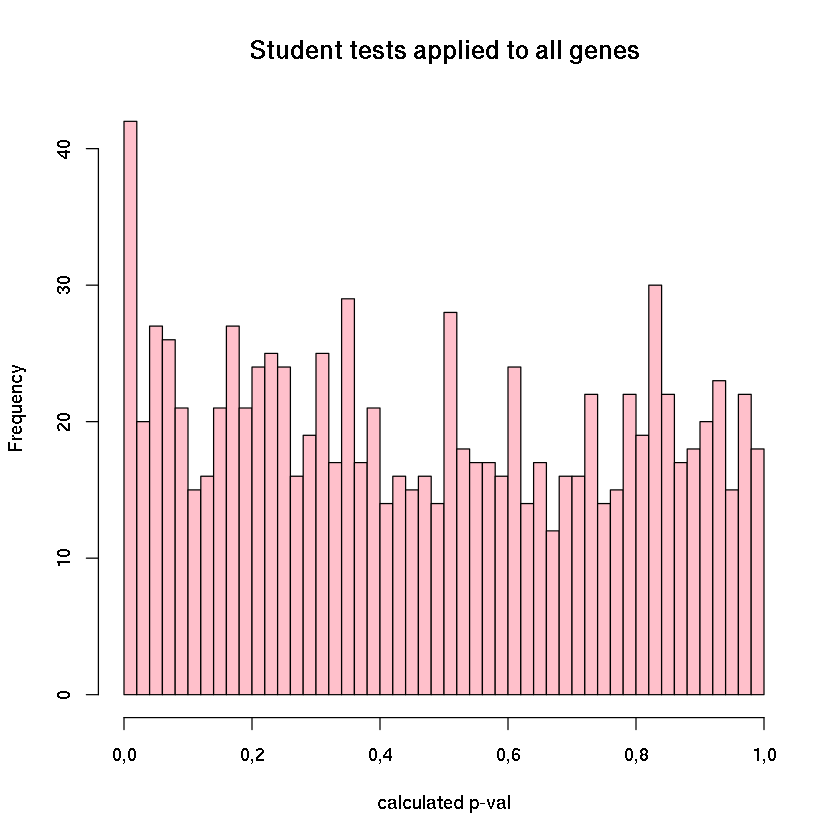

In [7]:
hist(pval, xlab = "calculated p-val", 
     main = "Student tests applied to all genes", nclass = 50, col = "pink")